# Stock Market Prediction 

In [1]:
import numpy as np

import pandas as pd
import pandas_datareader.data as web 

% matplotlib inline
import matplotlib.pyplot as plt 
from matplotlib import style
from matplotlib.finance import candlestick_ohlc 
import matplotlib.dates as mdates 

import datetime as dt

style.use('ggplot')

/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
# Extracting data 
#start = dt.datetime(2000, 1, 1)
#end = dt.datetime(2018,  1, 31)

#stock_data = web.DataReader('^NSEI', 'yahoo', start, end)

In [3]:
#stock_data.to_csv('Data/nifty50.csv')
# Loading data ...
stock_data = pd.read_csv('Data/nifty50.csv')

## Data Analysis

In [4]:
stock_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [5]:
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2558,2018-01-25,11095.599609,11095.599609,11009.200195,11069.650391,11069.650391,330300.0
2559,2018-01-26,NaN,NaN,NaN,NaN,NaN,NaN
2560,2018-01-29,11079.349609,11171.549805,11075.950195,11130.400391,11130.400391,241700.0
2561,2018-01-30,11120.849609,11121.099609,11033.900391,11049.650391,11049.650391,228000.0
2562,2018-01-31,11018.799805,11058.500000,10979.299805,11027.700195,11027.700195,245900.0


In [6]:
stock_data.shape

(2563, 7)

In [7]:
stock_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [8]:
stock_data.set_index('Date', inplace = True)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [9]:
display(stock_data.describe())

,Open,High,Low,Close,Adj Close,Volume
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,6404.919863,6447.277300,6354.397987,6401.643793,6401.643793,86072.171857
std,1854.162887,1846.774195,1857.402137,1851.545607,1851.545607,96912.828190
min,2526.199951,2585.300049,2252.750000,2524.199951,2524.199951,0.000000
25%,5131.200195,5168.399902,5084.649902,5132.299805,5132.299805,0.000000
50%,5885.049805,5918.649902,5837.200195,5884.700195,5884.700195,0.000000
75%,8047.549805,8100.700195,7997.149902,8047.299805,8047.299805,163800.000000
max,11120.849609,11171.549805,11075.950195,11130.400391,11130.400391,594200.000000


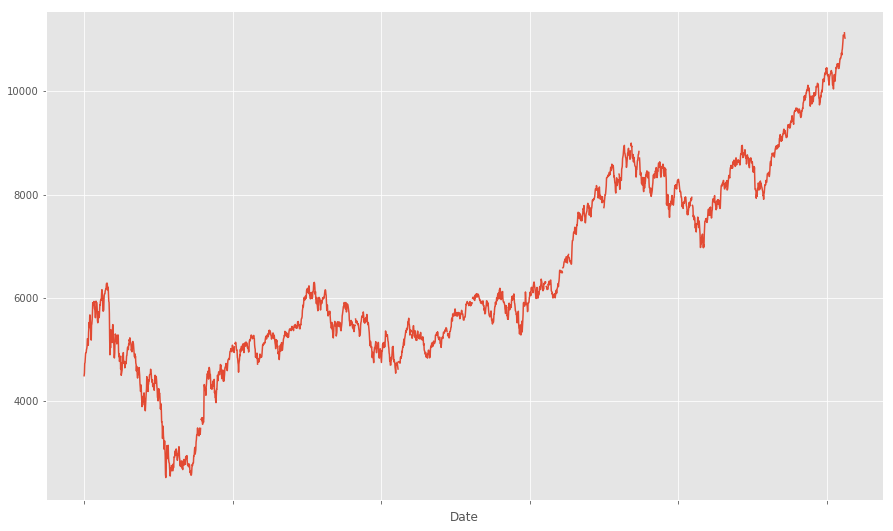

In [10]:
# Visualizing stock Data 
fig = plt.figure(figsize = (15, 9))
stock_data['Adj Close'].plot()
plt.show()
#fig.savefig('Figures/Fig1_Nifty50_Adj_Close.png')

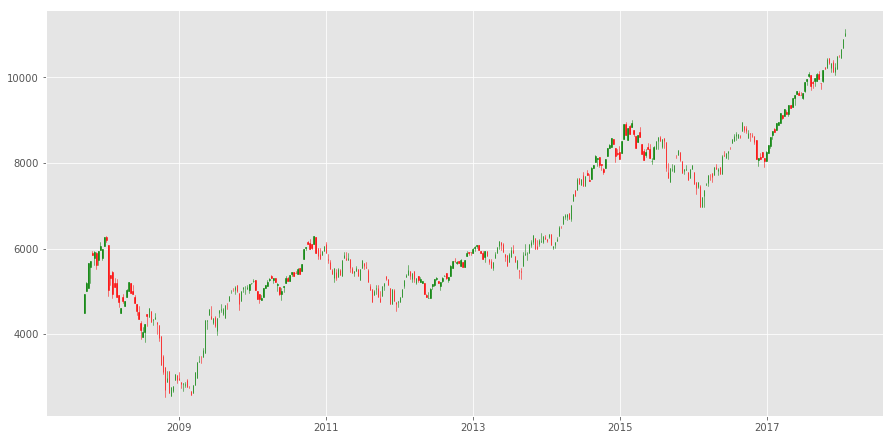

In [11]:
# Japenese Candlestick Plot ...

def plot_candlestick_ohlc():
    df = pd.read_csv('Data/nifty50.csv', parse_dates = True, index_col = 0)
    df_ohlc = df['Adj Close'].resample('10D').ohlc()
    df_volume = df['Volume'].resample('10D').sum()
    df_ohlc.reset_index(inplace = True)
    df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
    fig = plt.figure(figsize = (15, 9))
    ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan = 5, colspan = 1)
    #ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan = 1, colspan = 1, sharex = ax1)
    ax1.xaxis_date()
    candlestick_ohlc(ax1, df_ohlc.values, width = 2, colorup = 'g')
    #ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
    plt.show()
    #fig.savefig('Figures/Fig2_CandleStick_Plot.png')
    return
plot_candlestick_ohlc()

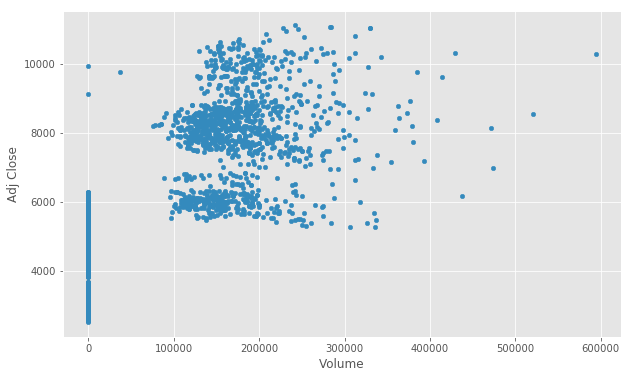

In [19]:
# Scatter plots 
stock_data.fillna(method = 'ffill', inplace = True)
stock_data.plot.scatter(x = 'Volume', y = 'Adj Close', figsize = (10, 6))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fc80a5cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2fc5de5208>]], dtype=object)

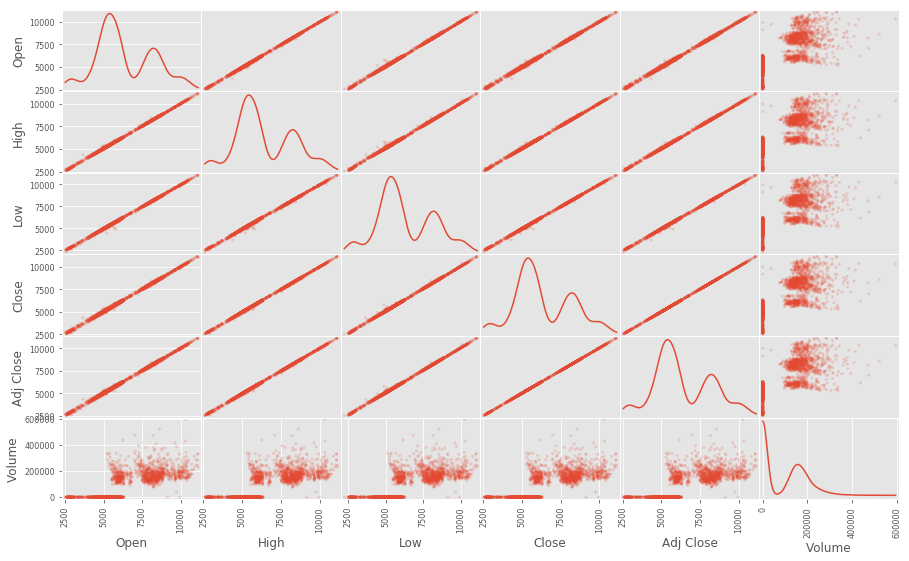

In [13]:
# Scatter Matrix 
from pandas.plotting import scatter_matrix 
scatter_matrix(stock_data, alpha = 0.2, figsize = (15, 9), diagonal = 'kde')

In [14]:
# Percentage change, from one day to next ...
pct_data = stock_data.pct_change()
pct_data = pct_data.replace([np.inf, -np.inf], 0)
pct_data.fillna(0, inplace = True)

pct_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2007-09-18,-0.005389,0.000605,-0.000290,0.011469,0.011469,0.0
2007-09-19,0.012494,0.041127,0.015330,0.040946,0.040946,0.0
2007-09-20,0.040569,0.004611,0.037558,0.003212,0.003212,0.0
2007-09-21,0.003823,0.019923,0.002658,0.018957,0.018957,0.0


In [15]:
# Feature relevance 
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

for col in list(pct_data.columns.values):
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature 
    new_data = pct_data.drop(col, axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(new_data, pct_data[col], test_size = 0.25, random_state = 42)
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    
    # Report the score of the prediction using the testing set 
    score = regressor.score(X_test, y_test)
    print("{} R^2 score : {:2f}".format(col, score))

/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Open R^2 score : 0.546034
High R^2 score : 0.618133
Low R^2 score : 0.363546
Close R^2 score : 0.998733
Adj Close R^2 score : 0.998733
Volume R^2 score : -1.552403


Close has the highest score, hence it is best to use this to determine prediction. Volume has the lowest score, which makes it not so useful for prediction. 

## Stock Predictor 

In [20]:
from keras.layers import Dense, LSTM, Activation, Dropout, Flatten
from keras.models import Sequential 

import datetime as dt 
import pandas as pd
import numpy as np

from sklearn import svm, metrics, preprocessing 
from sklearn.cross_validation import train_test_split, ShuffleSplit 
from sklearn.grid_search import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

import matplotlib.pyplot as plt 

Using TensorFlow backend.
/home/parab/anaconda3/envs/car-behavioral-cloning/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
